<a href="https://colab.research.google.com/github/Aniruddh-k/AI-Powered-Product-Review-and-Insights-Generator/blob/main/Notebooks/Sentiment_Analysis_and_top_keywords_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import re
import numpy as np
from bs4 import BeautifulSoup as bs
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [21]:
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r"<.*?>"," ",text)
  text = re.sub(r"[^a-zA-Z]+"," ",text)
  return text

In [30]:
def lemmatize_words(text):
  lem = WordNetLemmatizer()
  text = word_tokenize(text)
  text = ' '.join(lem.lemmatize(word) for word in text if word not in stopwords.words('english'))
  return text

In [32]:
df = pd.read_csv('/content/starbucks_reviews_LA.csv')

In [33]:
df.head()

,Review
0,I normally buy my Grande Pike at this Starbuck...
1,Very bad customer service. The person who take...
2,"Starbucks retail locations in Hollywood, Calif..."
3,Today is 05/29/2016. I would like to make a co...
4,I enjoy my coffee everyday. Unfortunately it h...


In [39]:
df['Review']=df['Review'].apply(clean_text)

In [40]:
df.head()

,Review
0,i normally buy my grande pike at this starbuck...
1,very bad customer service the person who takes...
2,starbucks retail locations in hollywood califo...
3,today is i would like to make a complaint abou...
4,i enjoy my coffee everyday unfortunately it ha...


In [42]:
df['Review'] = df['Review'].apply(lemmatize_words)

In [44]:
df['Review'].head()

,Review
0,normally buy grande pike starbucks central ave...
1,bad customer service person take order smile r...
2,starbucks retail location hollywood california...
3,today would like make complaint starbucks shif...
4,enjoy coffee everyday unfortunately decaf latt...


In [45]:
from transformers import pipeline

In [47]:
s_pipeline = pipeline('sentiment-analysis',model = 'distilbert-base-uncased-finetuned-sst-2-english')

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [48]:
def sentiment(df):
  for index,row in df.iterrows():
    review_text = row['Review']
    sentiment_result = s_pipeline(review_text)
    df.loc[index,'Sentiment'] = sentiment_result[0]['label']
    df.loc[index,'Score'] = sentiment_result[0]['score']
  return df

In [49]:
sentiment(df)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,Review,Sentiment,Score
0,normally buy grande pike starbucks central ave...,NEGATIVE,0.998049
1,bad customer service person take order smile r...,NEGATIVE,0.999352
2,starbucks retail location hollywood california...,NEGATIVE,0.997157
3,today would like make complaint starbucks shif...,NEGATIVE,0.996638
4,enjoy coffee everyday unfortunately decaf latt...,NEGATIVE,0.998653
5,hard time cup starbucks coffee expensive coffe...,NEGATIVE,0.976582
6,regular customer starbucks never knew buy cup ...,NEGATIVE,0.996729
7,morning picked sunday edition ny time paid hea...,NEGATIVE,0.997752
8,always like get coffee like around p p seems e...,NEGATIVE,0.887768
9,first day new gold card far going well feel le...,POSITIVE,0.862458


<Axes: ylabel='count'>

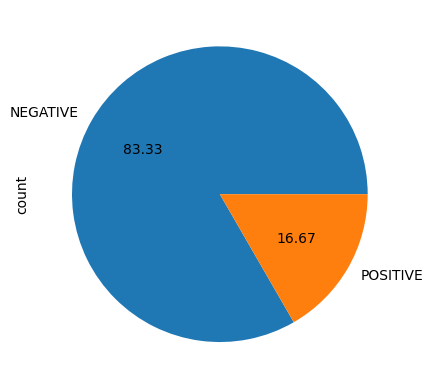

In [54]:
df['Sentiment'].value_counts().plot(kind='pie',autopct ='%.2f')

In [60]:
import matplotlib.pyplot as plt
import plotly.express as px

In [61]:
px.bar(df,x='Sentiment',y='Score',color='Sentiment')

In [67]:
sentiment_counts = df['Sentiment'].value_counts()
fig = px.pie(
    values=sentiment_counts.values,  # Values for the pie chart (counts of each sentiment)
    names=sentiment_counts.index,  # Labels for the pie chart (sentiment categories)
    title='Distribution of Sentiments',  # Title of the chart
)
fig.update_layout(width=400, height=400)
fig.show()

In [74]:
positive_reviews = df[df['Sentiment'] == 'POSITIVE']['Review']
negative_reviews = df[df['Sentiment'] == 'NEGATIVE']['Review']

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
def get_top_keywords(text,n=10,ngram_range=(1,2)):
  vect = TfidfVectorizer(stop_words='english',ngram_range=ngram_range,max_features=100)
  matrix = vect.fit_transform(text)
  terms = vect.get_feature_names_out()
  score = matrix.sum(axis = 0)
  score = score.A1
  top_indices = score.argsort()[::-1][:n]
  return [(terms[i], score[i]) for i in top_indices]

In [77]:
top_strength_keywords = get_top_keywords(positive_reviews)

In [78]:
top_strength_keywords

[('square', np.float64(0.33333333333333337)),
 ('rice crispy', np.float64(0.33333333333333337)),
 ('rice', np.float64(0.33333333333333337)),
 ('inside', np.float64(0.33333333333333337)),
 ('hair inside', np.float64(0.33333333333333337)),
 ('hair', np.float64(0.33333333333333337)),
 ('inside rice', np.float64(0.33333333333333337)),
 ('crispy square', np.float64(0.33333333333333337)),
 ('crispy', np.float64(0.33333333333333337)),
 ('new gold', np.float64(0.20851441405707477))]

In [82]:
positive_reviews[11]

'found hair inside rice crispy square'

In [83]:
s1_pipeline = pipeline('sentiment-analysis',model = 'nlptown/bert-base-multilingual-uncased-sentiment')

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


In [85]:
def sentiment_1(df):
  for index,row in df.iterrows():
    review_text = row['Review']
    sentiment_result = s1_pipeline(review_text)
    df.loc[index,'Sentiment'] = sentiment_result[0]['label']
    df.loc[index,'Score'] = sentiment_result[0]['score']
  return df

In [86]:
sentiment_1(df)

,Review,Sentiment,Score
0,normally buy grande pike starbucks central ave...,1 star,0.668744
1,bad customer service person take order smile r...,1 star,0.965844
2,starbucks retail location hollywood california...,1 star,0.882465
3,today would like make complaint starbucks shif...,1 star,0.468154
4,enjoy coffee everyday unfortunately decaf latt...,1 star,0.407587
5,hard time cup starbucks coffee expensive coffe...,1 star,0.454964
6,regular customer starbucks never knew buy cup ...,1 star,0.637817
7,morning picked sunday edition ny time paid hea...,1 star,0.726793
8,always like get coffee like around p p seems e...,1 star,0.336730
9,first day new gold card far going well feel le...,5 stars,0.607243
